In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## load data

In [3]:
#### import out clean pickle file
trees = pd.read_pickle('./../data/modified/trees_first_clean.pkl')

In [4]:
trees.head()

,ELEM_POINT_ID,CODE,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,LONGITUDE,LATITUDE
0,31906,ESP32632,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,2001.0,Ville de Grenoble,5.740727,45.190539
1,31905,ESP32631,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,2001.0,Ville de Grenoble,5.740748,45.190525
2,31904,ESP32630,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,2001.0,Ville de Grenoble,5.740697,45.190498
3,31903,ESP32629,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,2001.0,Ville de Grenoble,5.740675,45.190491
4,31902,ESP32628,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,2001.0,Ville de Grenoble,5.740702,45.190479


In [5]:
trees.columns

Index(['ELEM_POINT_ID', 'CODE', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION',
       'COLLECTIVITE', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

# make train test split

#### random split

In [6]:
year = trees.pop('ANNEEDEPLANTATION')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(trees, year, random_state = 800)

In [9]:
y_train.shape

(22816,)

In [10]:
y_test.shape

(7606,)

# basic stats

Should usually only be done after the split!! We dont want to even see our y_test data if we can avoid it, otherwise we may bias our final model and it wont generalise well.

In [11]:
train = pd.concat([X_train, y_train], axis=1).copy()

In [12]:
train.describe()

,ELEM_POINT_ID,ADR_SECTEUR,LONGITUDE,LATITUDE,ANNEEDEPLANTATION
count,22816.000000,22816.000000,22816.000000,22816.000000,22816.000000
mean,17650.728524,3.870004,5.727232,45.176694,1988.234353
std,10413.879692,1.697305,0.012692,0.011814,16.451785
min,2.000000,1.000000,5.697915,45.151572,1950.000000
25%,8696.750000,2.000000,5.717458,45.165806,1975.000000
50%,17476.500000,4.000000,5.729647,45.175359,1985.000000
75%,26157.500000,5.000000,5.737346,45.186574,2001.000000
max,39374.000000,6.000000,5.760530,45.207024,2018.000000


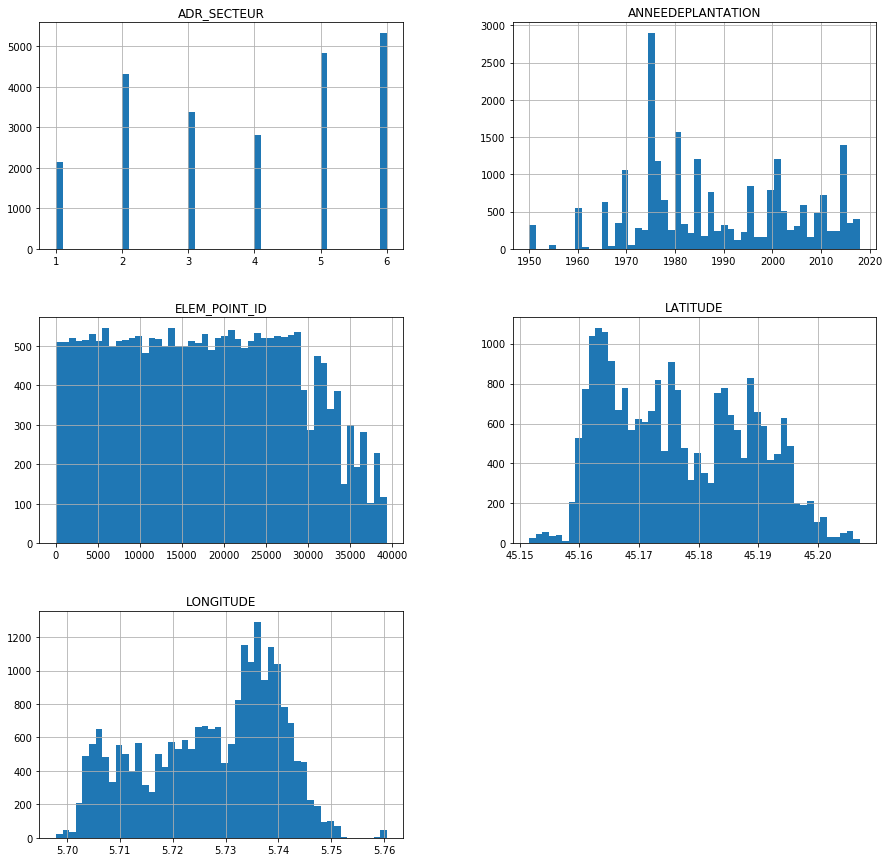

In [25]:
train.hist(bins=50, figsize = (15,15));

In [26]:
train.isnull().sum()

ELEM_POINT_ID               0
CODE                        0
SOUS_CATEGORIE              0
SOUS_CATEGORIE_DESC         0
CODE_PARENT                 0
CODE_PARENT_DESC            0
ADR_SECTEUR                 0
GENRE_BOTA                 31
ESPECE                   1411
VARIETE                 19646
STADEDEDEVELOPPEMENT      970
COLLECTIVITE                0
LONGITUDE                   0
LATITUDE                    0
ANNEEDEPLANTATION           0
dtype: int64

## Basic vis that might give us some insight into the problem

Again only on training split data!

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


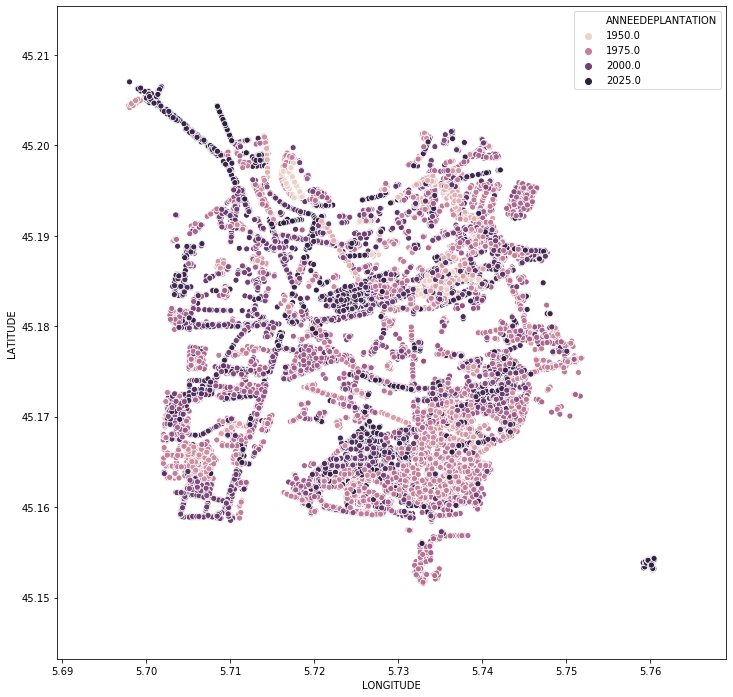

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x="LONGITUDE", y="LATITUDE", hue="ANNEEDEPLANTATION",
                     data=train, ax=ax, );

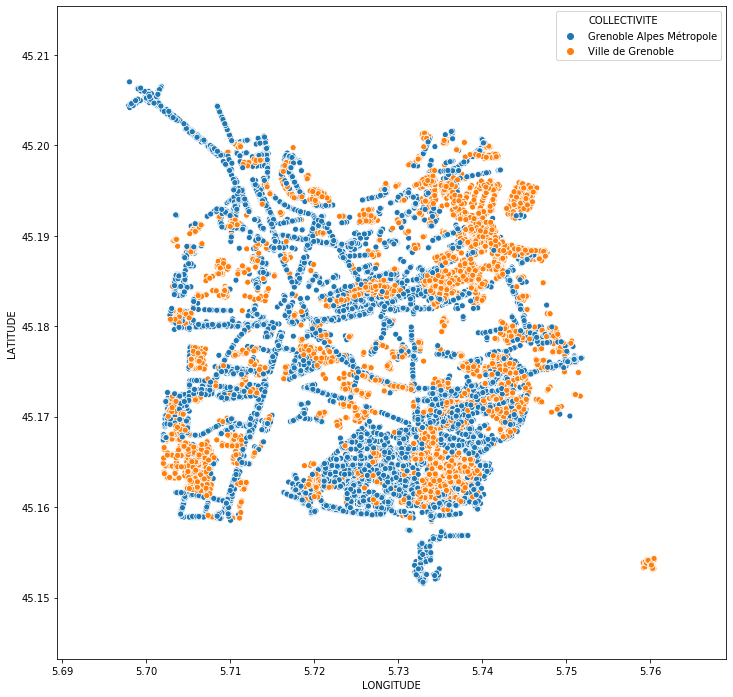

In [28]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x="LONGITUDE", y="LATITUDE", hue="COLLECTIVITE",
                     data=train, ax=ax);

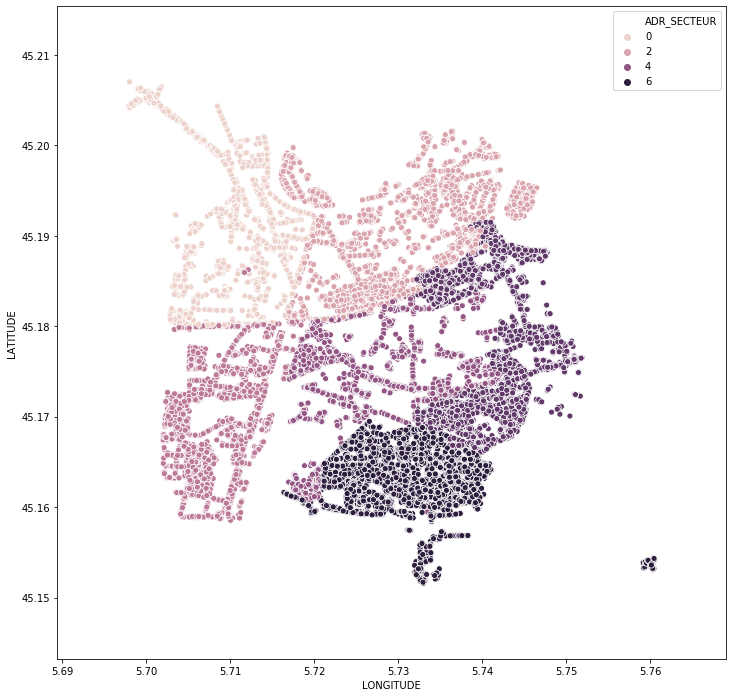

In [29]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x="LONGITUDE", y="LATITUDE", hue="ADR_SECTEUR",
                     data=train, ax=ax);

In [30]:
train.columns

Index(['ELEM_POINT_ID', 'CODE', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'COLLECTIVITE',
       'LONGITUDE', 'LATITUDE', 'ANNEEDEPLANTATION'],
      dtype='object')

Replace STADEDEDEVELOPPEMENT with numerical values for plotting

In [31]:
train.STADEDEDEVELOPPEMENT.value_counts()

Arbre adulte          17227
Arbre jeune            4255
Arbre vieillissant      364
Name: STADEDEDEVELOPPEMENT, dtype: int64

In [32]:
development_mappings = {"Arbre jeune": 1, "Arbre adulte": 2, "Arbre vieillissant": 3}
train = train.replace({'STADEDEDEVELOPPEMENT': development_mappings})
train.STADEDEDEVELOPPEMENT.value_counts()

2.0    17227
1.0     4255
3.0      364
Name: STADEDEDEVELOPPEMENT, dtype: int64

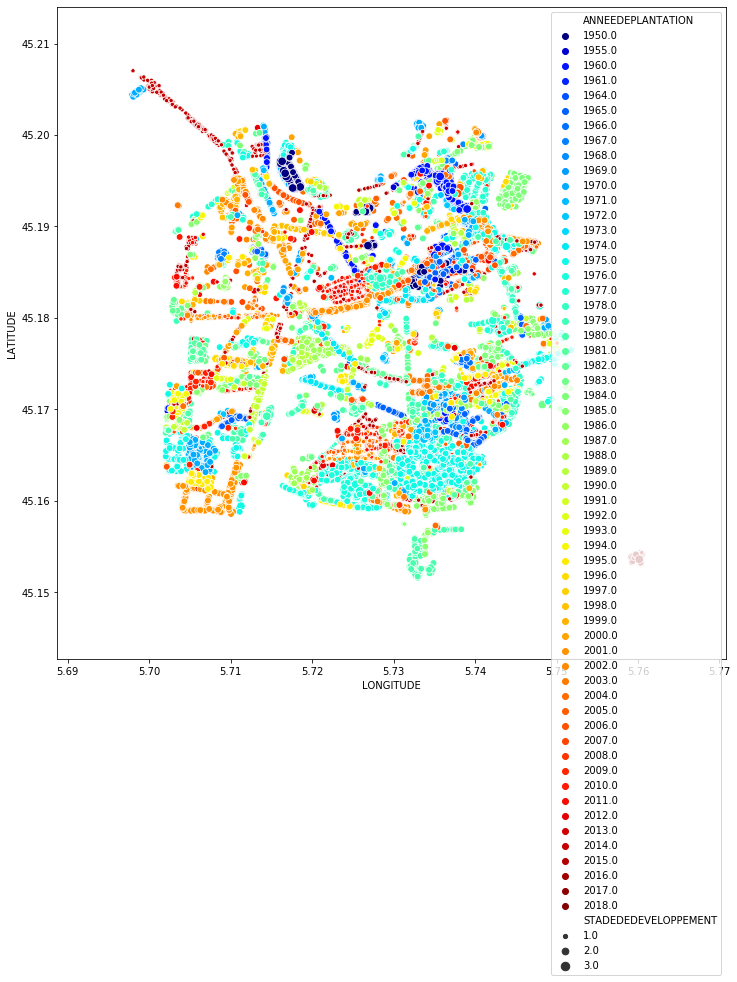

In [33]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x="LONGITUDE", y="LATITUDE", hue="ANNEEDEPLANTATION",size="STADEDEDEVELOPPEMENT",alpha='auto',
                     data=train, ax=ax, size_order=[0.1,50,1000], palette='jet', legend='full');

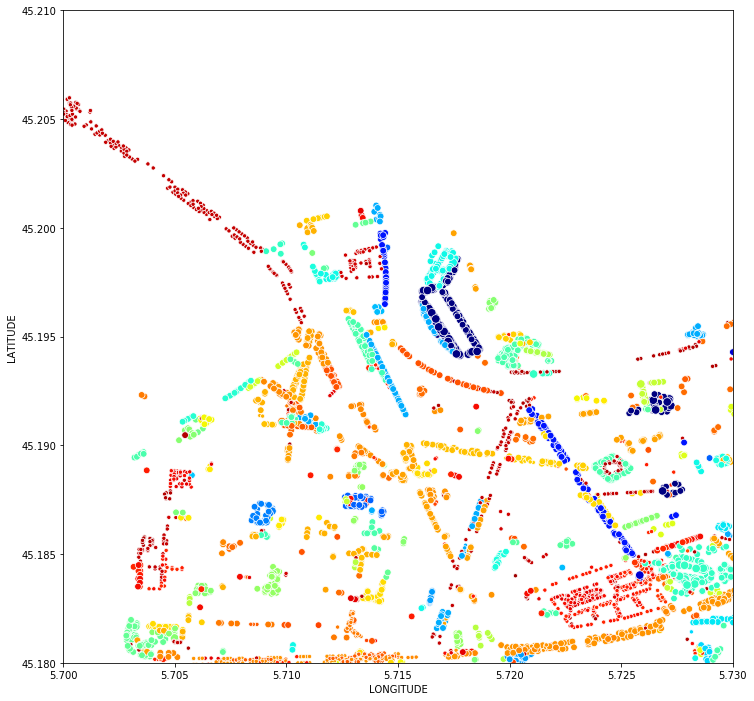

In [34]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x="LONGITUDE", y="LATITUDE", hue="ANNEEDEPLANTATION",size="STADEDEDEVELOPPEMENT",alpha='auto',
                     data=train, ax=ax,size_order=[0.1,50,1000],  palette='jet', legend=False,);

ax.set(xlim=(5.7, 5.73), ylim=(45.18, 45.21));

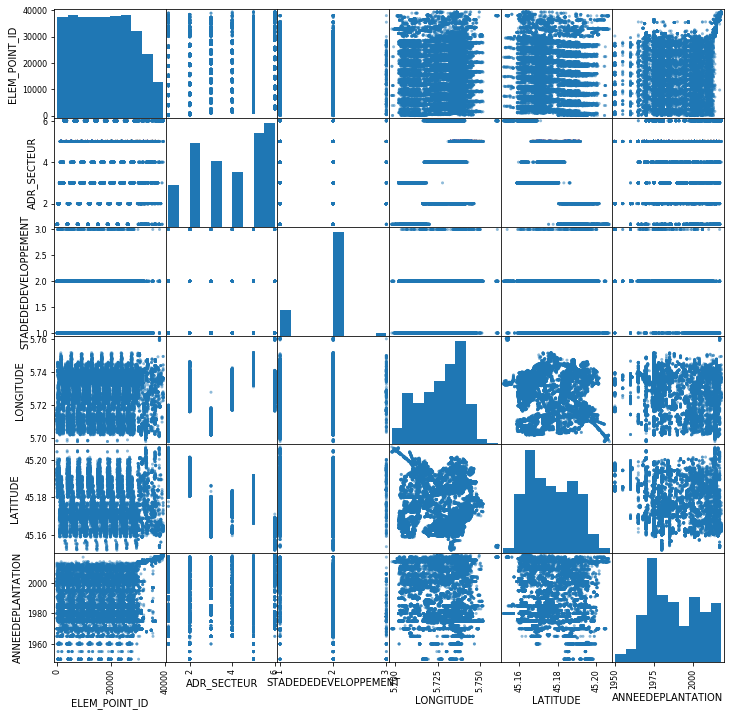

In [35]:
pd.plotting.scatter_matrix(train, figsize=(12,12));

# Naive model
Used as a baseline model to know later if our ML models are useful. Here based on average tree age in X_test.

In [18]:
y_train.median()

1985.0

In [19]:
X_test.shape

(7606, 14)

In [20]:
y_test_pred = np.ones(len(X_test)) * y_train.median()

In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred)
print('Root mean squared error: ', np.sqrt(mse))

Root mean squared error:  16.85826672529921


# Prepare data - using transformation pipelines

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

### make pipelines for numerical 

Its a good idea to slowly build on your pipeline till you fully understand them...lets just try a simple numerical pipeline.

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [34]:
num_attribs = ['LONGITUDE', 'LATITUDE']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

Check if pipelines creating expected shape

In [35]:
X_train[num_attribs].shape

(22816, 2)

In [37]:
X_trainT = num_pipeline.fit_transform(X_train[num_attribs])
#  
# pd.DataFrame(X_trainT).shape

# model build

### linear regression

build linear regresion module and estimate test error using cross validation.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_trainT, y_train, scoring='neg_mean_squared_error', cv=3)
scores

pd.Series(np.sqrt(-scores)).describe()


count     3.000000
mean     16.203670
std       0.119411
min      16.127510
25%      16.134859
50%      16.142207
75%      16.241749
max      16.341292
dtype: float64

Great this is better than the naive model. Still not great though.

### Decision tree regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)


scores = cross_val_score(tree_reg, X_trainT, y_train, scoring='neg_mean_squared_error', cv=10)
print('Cross validation results')
pd.Series(np.sqrt(-scores)).describe()


Cross validation results


count    10.000000
mean     11.494102
std       0.401148
min      10.625732
25%      11.334124
50%      11.502982
75%      11.807289
max      11.975735
dtype: float64

This model looks better!

### random forest - with small no of trees

In [50]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=4, max_features=2)#, random_state=42)

print('Cross validation results')
scores = cross_val_score(forest_reg, X_trainT, y_train, scoring='neg_mean_squared_error', cv=10)
pd.Series(np.sqrt(-scores)).describe()

Cross validation results


count    10.000000
mean      9.926591
std       0.390796
min       9.352422
25%       9.672428
50%       9.935188
75%      10.203470
max      10.473164
dtype: float64

TO DO NEXT:
* try to create a pipeline only for catagorical variables!
* build some models with this transformed data
* decide if they are better

* is it worth combining both catagorical and numerical vars? If so try to combine both pipelines!